# Statement of the problem
Three door, 2 goat (0), 1 car (1)  
Me = i choose a door, I don't open it   
2° player = he choose a different one door, he open it  
3° player = he choose a door not opened  

In [8]:
import numpy as np
from tqdm.notebook import tqdm
import pylab as plt
plt.rcParams['figure.figsize'] = [8, 5]

In [23]:
def threedoors(which): # Function of the process
    labels = np.arange(3) # Labels of the three doors
    doors = np.zeros(3, dtype=int) # Content of three doors
    doors[np.random.choice(labels)] = 1 # One of them contains the prize, don't know which one (1=car, 0=goat)
    my_choice = np.random.choice(labels) # I pick one random door
    notchosen = np.delete(labels, my_choice) # Doors - door that I chose

    while True: # 2° player that open a door with goat
        opened = np.random.choice(notchosen) # Open one of the two doors I didn't choose
        if doors[opened] == 0: # Break only if 2°plyr choose a goat
            other = int(np.delete(labels,[opened,my_choice])[0]) # This is the other door left (not chosen by me and not open by host)
            break

    if which == 'switch': 
        return doors[other]

    if which == 'keep':
        return doors[my_choice]
    
    if which == 'external':
        picked = np.random.choice(notchosen)
        return doors[picked]


In [24]:
N = int(1e4) # Number of iteration
probs = {}

for which in tqdm(['switch','keep','external']): # Loop for three cases of wich
    events = [threedoors(which) for i in tqdm(range(N))] # Loop for fixed wich N times
    probs[which] = np.sum(events)/N # From probability definition (remember 1=car)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

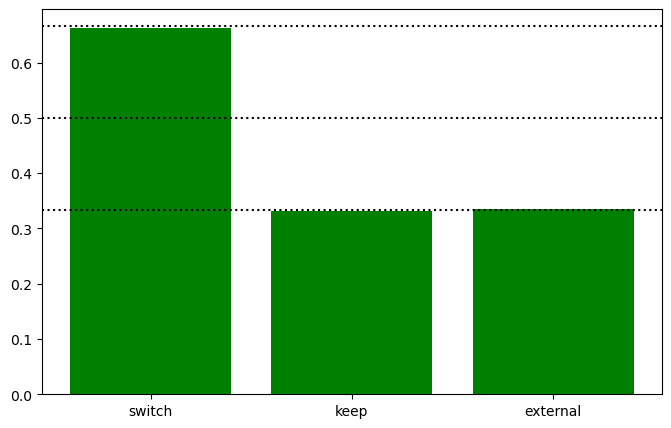

In [ ]:
# A simple bar chart
plt.bar([0,1,2], [probs[k] for k in probs.keys()], color='green');
plt.xticks([0,1,2], probs.keys());

for y in [1/3,1/2,2/3]: #  Dotted Line...it's the expected values
    plt.axhline(y, ls='dotted',c='black')

### Let's break it down:

Before a door is chosen, the probability of finding a car is clearly $1/3$.

After one door has been chosen:

* Probability of car behind **Door 1** $= 1/3$
* Probability of car behind **Doors 2 or 3** $= 2/3$

Before a door is chosen, the probability of finding a car is clearly $1/3$.

After one door has been chosen:

* Probability of car behind **Door 1** $= 1/3$
* Probability of car behind **Doors 2 or 3** $= 2/3$